In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr
from scipy import stats

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

hrt = pd.read_csv('heart.csv')
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


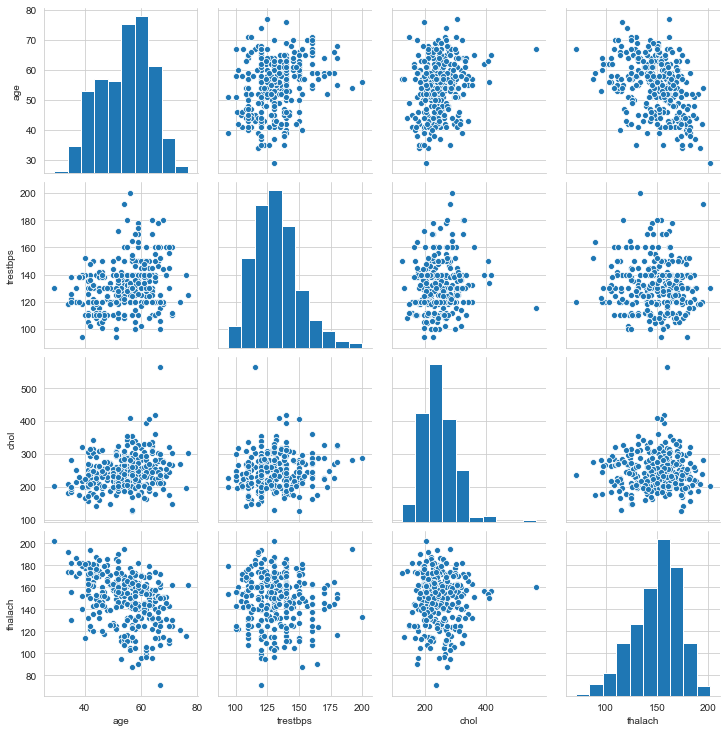

In [2]:
x = hrt[['age' ,'trestbps', 'chol', 'thalach']]
sb.pairplot(x)

In [3]:
age = hrt['age']
trest = hrt['trestbps']
chol = hrt['chol']
thal = hrt['thalach']
pearsonr_coefficient, p_value = pearsonr(age, trest)
print( 'Коэфицент корреляции Пирсона возраст/кровяное давление %0.3f' % (pearsonr_coefficient))

pearsonr_coefficient, p_value = pearsonr(age, chol)
print( 'Коэфицент корреляции Пирсона возраст/холестерин %0.3f' % (pearsonr_coefficient))

pearsonr_coefficient, p_value = pearsonr(age, thal)
print( 'Коэфицент корреляции Пирсона возраст/макс пульс %0.3f' % (pearsonr_coefficient))

Коэфицент корреляции Пирсона возраст/кровяное давление 0.279
Коэфицент корреляции Пирсона возраст/холестерин 0.214
Коэфицент корреляции Пирсона возраст/макс пульс -0.399


slope: 0.539445    intercept: 102.296101
slope: 0.539445    intercept: 102.296101
slope: -1.005077    intercept: 204.289210


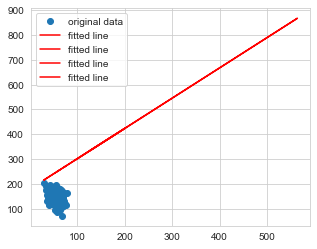

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age, trest)
print("slope: %f    intercept: %f" % (slope, intercept))

slope1, intercept1, r_value, p_value, std_err = stats.linregress(age, chol)
print("slope: %f    intercept: %f" % (slope, intercept))

slope, intercept, r_value, p_value, std_err = stats.linregress(age, thal)
print("slope: %f    intercept: %f" % (slope, intercept))

plt.plot(age, thal, 'o', label='original data')
plt.plot(x, intercept1 + slope1*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
[,4] trestbps - resting blood pressure (in mm Hg on admission to the hospital)
[,5] chol - serum cholestoral in mg/dl
[,8] thalach - maximum heart rate achieved